In [542]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [635]:
df = pd.read_csv('complete_data_EM_3.csv')
global_df = pd.read_csv('global_data.csv')

In [636]:
df.head()

,Unnamed: 0,Acousticness,Danceability,Duration Ms,Energy,Instrumentalness,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence,Explicit,Records,Artist_clean,Album,Continent,Country,Rank
0,1,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Australia,Australia,23
1,2,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Austria,5
2,3,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Belgium,8
3,4,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,Europe,Bulgaria,1
4,5,0.11788,0.7372,155645.8,0.6806,0.0,0.1598,-5.112,72.0,0.279,118.2184,0.4342,1.0,1.0,6ix9ine,GOOBA,North America,Canada,12


In [637]:
#list artists and number of unique countries they had top songs in
artist_country = pd.DataFrame({"Artist_clean": df['Artist_clean'],
                                "Country": df['Country']
})
artist_country = artist_country.groupby(['Artist_clean']).nunique()[('Country')].sort_values(ascending=False)
artist_country = pd.DataFrame(artist_country)

artist_country.head()

,Country
Artist_clean,
The Weeknd,59
Lady Gaga,59
Dua Lipa,53
Powfu,52
Tones And I,52


In [638]:
artist_country.value_counts
artist_country.count()

Country    189
dtype: int64

In [639]:
artist_country_drop = artist_country.loc[artist_country['Country'] > 10]

artist_country_drop = artist_country_drop[('Country')].sort_values(ascending=False)

artist_country_drop.head()

artist_country_drop = pd.DataFrame(artist_country_drop)

artist_country_drop.head()

,Country
Artist_clean,
The Weeknd,59
Lady Gaga,59
Dua Lipa,53
Powfu,52
Tones And I,52


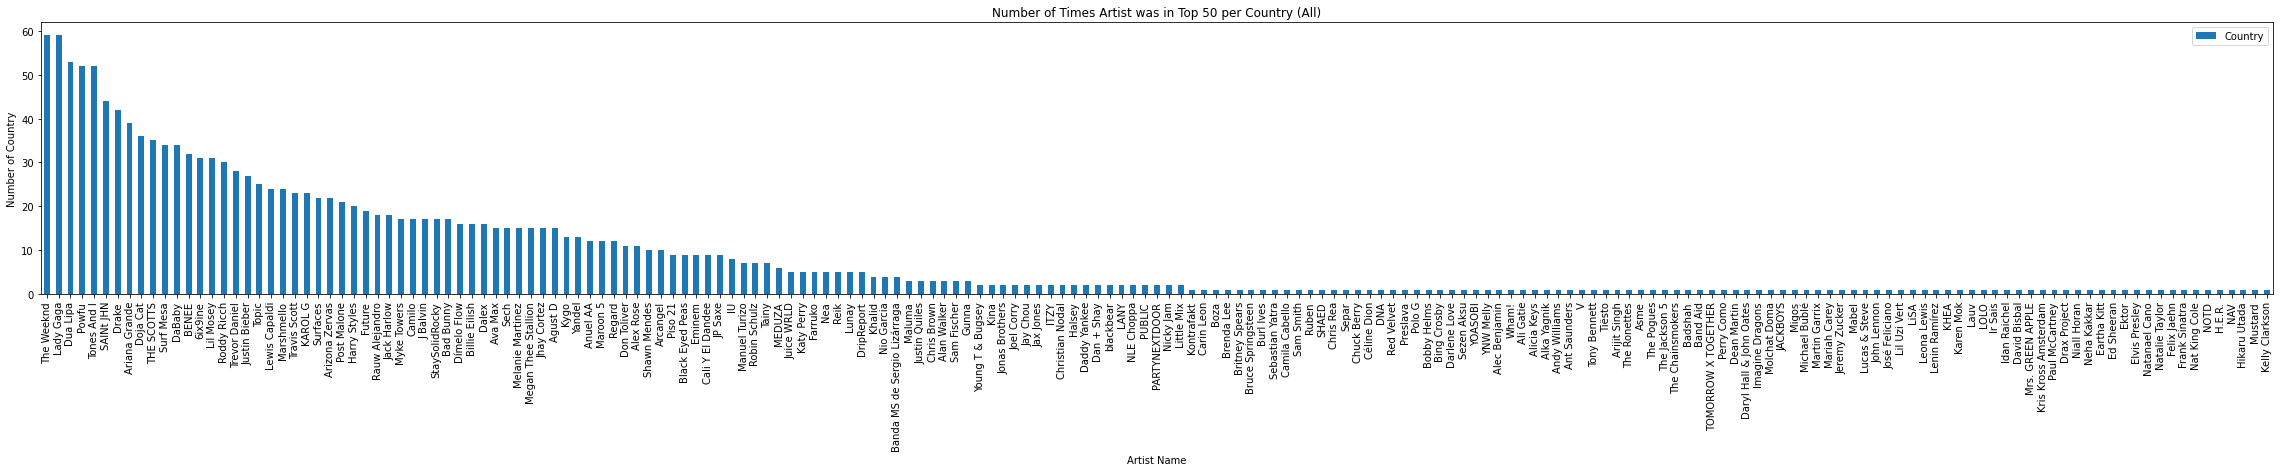

In [640]:
artist_country.plot(kind="bar", figsize=(40,5))
plt.ylabel("Number of Country")
plt.xlabel("Artist Name")
plt.title("Number of Times Artist was in Top 50 per Country (All)")
plt.savefig("Images_Michelle/country_per_artist_all.png")

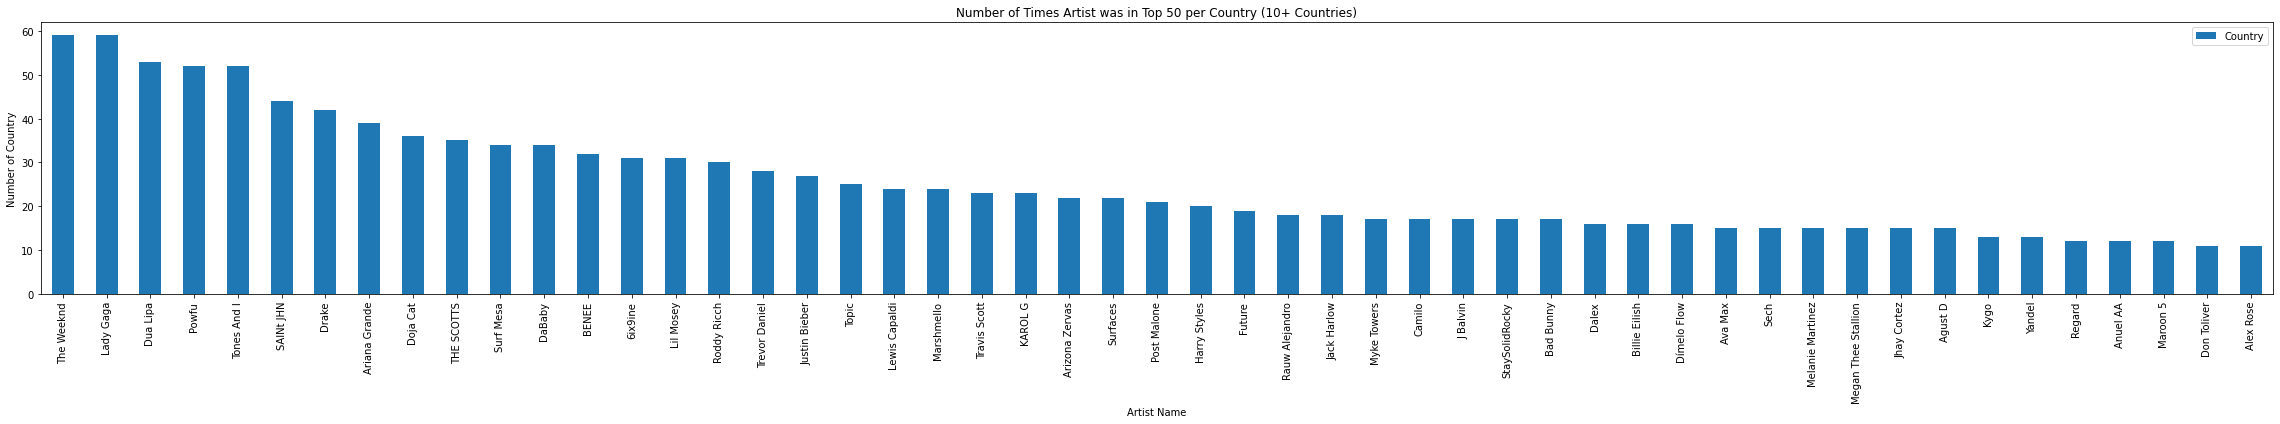

In [641]:
artist_country_drop.plot(kind="bar", figsize=(40,5))
plt.ylabel("Number of Country")
plt.xlabel("Artist Name")
plt.title("Number of Times Artist was in Top 50 per Country (10+ Countries)")
plt.savefig("Images_Michelle/country_per_artist_10_plus.png")

In [642]:
# Grab top ten artists
top_ten_artist = artist_country_drop.iloc[:10]
top_ten_artist

,Country
Artist_clean,
The Weeknd,59
Lady Gaga,59
Dua Lipa,53
Powfu,52
Tones And I,52
SAINt JHN,44
Drake,42
Ariana Grande,39
Doja Cat,36


In [643]:
top_artist_names = top_ten_artist.index.values.tolist()
top_artist_count = top_ten_artist.values.tolist()
top_artist_names

['The Weeknd',
 'Lady Gaga',
 'Dua Lipa',
 'Powfu',
 'Tones And I',
 'SAINt JHN',
 'Drake',
 'Ariana Grande',
 'Doja Cat',
 'THE SCOTTS']

''

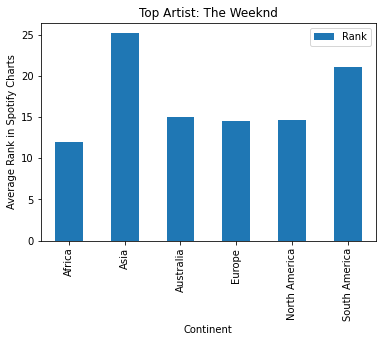

In [666]:
the_weeknd = df.loc[df['Artist_clean'] == 'The Weeknd', ['Artist_clean', 'Continent', 'Rank']]
the_weeknd_average = the_weeknd.groupby(['Continent']).mean()
the_weeknd_average.plot(kind='bar')
plt.title("Top Artist: The Weeknd")
plt.xlabel("Continent")
plt.ylabel("Average Rank in Spotify Charts")
;

In [765]:
# # # for loop to loop through top ten artists
# for name in top_artist_names:
#     artist_name = df.loc[df['Artist_clean'] == name, ['Artist_clean', 'Continent', 'Rank']]
#     artist_name = artist_name.groupby(['Continent']).mean()
#     artist_name.plot(kind='line')
#     plt.title(f' Top Artist: {name}')
#     plt.xlabel("Continent")
#     plt.ylabel("Average Rank in Spotify Charts")
#     ;
    
#     df.pivot(index='channel', columns='ab', values='booked').plot(kind='bar')

In [766]:
# # for loop to loop through top ten artists
# for name in top_artist_names:
#     artist_name = df.loc[df['Artist_clean'] == name, ['Artist_clean', 'Continent', 'Rank']]
#     artist_name = artist_name.groupby(['Continent']).mean()
#     artist_name.plot(kind='bar')
#     plt.title(f' Top Artist: {name}')
#     plt.xlabel("Continent")
#     plt.ylabel("Average Rank in Spotify Charts")
#     ;

In [767]:
top_artist_names

['The Weeknd',
 'Lady Gaga',
 'Dua Lipa',
 'Powfu',
 'Tones And I',
 'SAINt JHN',
 'Drake',
 'Ariana Grande',
 'Doja Cat',
 'THE SCOTTS']

In [768]:
#pull in global data
global_df.count()

Unnamed: 0          50
Acousticness        50
Danceability        50
Duration Ms         50
Energy              50
Instrumentalness    50
Liveness            50
Loudness            50
Popularity          50
Speechiness         50
Tempo               50
Valence             50
Explicit            50
Records             50
Artist_clean        50
Album               50
Continent           50
Country             50
Rank                50
dtype: int64

In [769]:
# for name in top_artist_names:
#     global_artist_name = global_df.loc[global_df['Artist_clean'] == name, ['Artist_clean', 'Continent', 'Rank']]
#     global_artist_name = global_artist_name.groupby(['Continent']).mean()
#     global_artist_name.plot(kind='bar')
#     plt.title(f' Top Artist: {name}')
#     plt.xlabel("Continent")
#     plt.ylabel("Average Rank in Spotify Charts")
#     ;

In [770]:
#check values
# for name in top_artist_names:
#     global_artist_name = global_df.loc[global_df['Artist_clean'] == name, ['Artist_clean', 'Rank']]
#     print(global_artist_name)

''

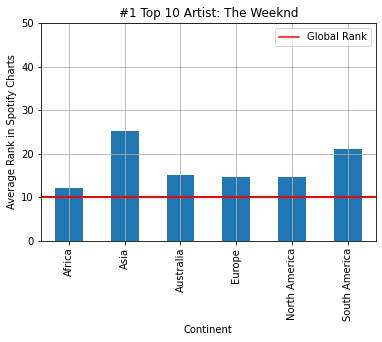

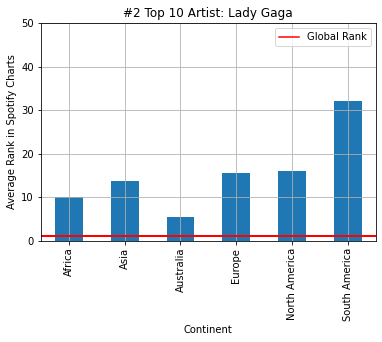

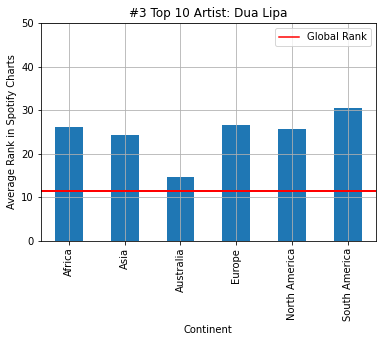

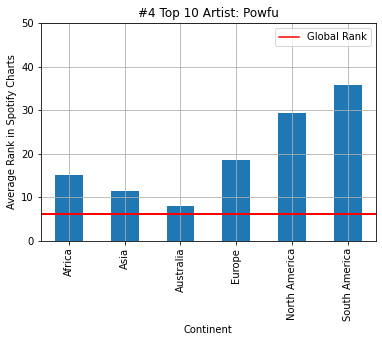

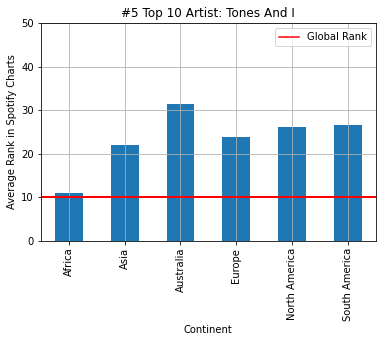

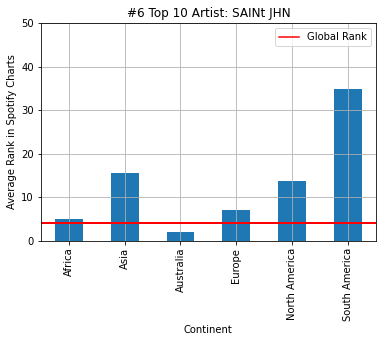

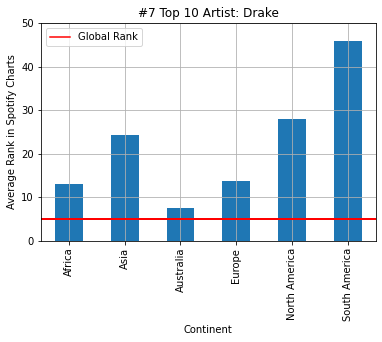

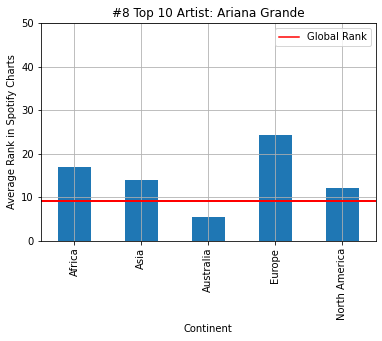

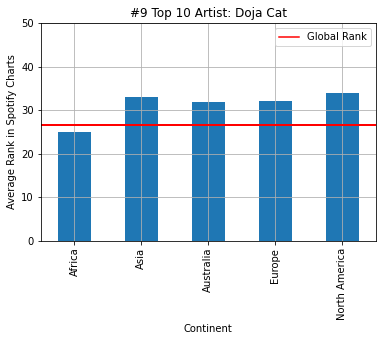

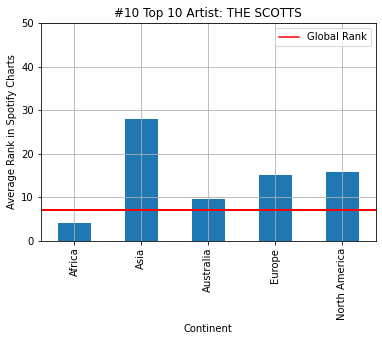

In [771]:
# # for loop to loop through top ten artists
index = 0

for name in top_artist_names:
    index += 1
    artist_name = df.loc[df['Artist_clean'] == name, ['Artist_clean', 'Continent', 'Rank']]
    artist_name = artist_name.groupby(['Continent']).mean()
    artist_name.plot(kind='bar')
    plt.title(f'#{index} Top 10 Artist: {name}')
    plt.xlabel("Continent")
    plt.ylabel("Average Rank in Spotify Charts")
    plt.grid()
    plt.ylim(0,50)
    
    for artist_name in top_artist_names:
        global_artist_name = global_df.loc[global_df['Artist_clean'] == name, ['Artist_clean', 'Rank']].mean()
        rank = global_artist_name['Rank']
        plt.axhline(y=rank, color='r', linestyle='-')
        plt.legend(['Global Rank'])
;

In [772]:
# artist_rank_michelle = pd.DataFrame({"Artist_clean": df['Artist_clean'], 
#                             "Continent" : df['Continent'],
#                             "Country" : df['Country'],
#                                 "Rank": df['Rank']})

# artist_rank_michelle.to_csv("artist_rank_michelle.csv")
# artist_rank_michelle.head()

# south_america = artist_rank_michelle.loc[artist_rank_michelle['Continent'] == 'South America']
# south_america_countries = south_america.groupby(['Country', 'Artist_clean']).mean()
# south_america_countries

In [773]:
# aritst_rank_michelle_index = artist_rank_michelle.set_index('Continent')
# aritst_rank_michelle_index = aritst_rank_michelle_index.groupby(['Continent','Country', 'Artist_clean'])
# aritst_rank_michelle_index.head()

In [ ]:
# artist_rank_michelle_clean = artist_rank_michelle.groupby(['Continent','Country', 'Artist_clean'])
# artist_rank_michelle_clean = artist_rank_michelle_clean.rename(columns={"Rank": "Rating"})
# artist_rank_michelle_clean.to_csv("artist_rank_michelle_clean.csv")
# artist_rank_michelle_clean.head(25)

In [567]:
# sixnine_df = artist_rank_michelle.loc[df['Artist_clean'] == "6ix9ine", ['Artist_clean','Continent', 'Country', 'Rank']]
# sixnine_df.head()

In [565]:
# x_axis = []
# tick_locations = x_axis
# countries= []
# for row in sixnine_df:
#     countries.append(sixnine_df['Country'])
# # plt.xticks(tick_locations, countries)
# # sixnine_df.plt(x='Country',y='Rank')
# print(countries)

In [566]:
# sixnine_df.plot(kind="bar", figsize=(40,5), stacked=True)
# plt.ylabel("Rank")
# plt.xlabel("{idk")
# plt.title('blank')

In [244]:
#interrate through dataframe and plot each country on a seperate graph